# Performing Initial Analysis on the dataset to understand the data

In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
%matplotlib inline

In [106]:
## Importing the given data set 
path = os.path.join("D:\FSDS PROJECT\Project3_\Data_Train.xlsx")
data = pd.read_excel(path)

In [47]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Lets see what we have here as features
1. Airline --> This feature contain the airline company 
2. Date_of_journey --> This feature contain the journy date in fromat of dd/mm/yyyy
3. Source --> This feature contain the source/ pick up location
4. Destination --> This feature contain the final destination of flight
5. Route --> Route of the journy
6. Dep_Time --> Time of Depature of flight
7. Arival_Time --> Time of Arival some time with date 
8. Duration --> Total Duration of Flight 
9. Total_Stops --> Total no. of stop
10. Additional_info --> Additional info if any 
11. Price --> Price of flight --> Target 


In [48]:
## let's see the datatype of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [49]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [50]:
## As there is only one na value therefore we will drop NA
data.dropna(inplace=True)

In [51]:
data.drop_duplicates(inplace=True)

In [52]:
## Lets see all fetures one by one 
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [53]:
Airline = list(data['Airline'].unique())

In [54]:
print(f"we have {len(Airline)} Airlines ")
print(f"And they are {Airline}")

we have 12 Airlines 
And they are ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet']


In [55]:
print(f"The value count are \n{data['Airline'].value_counts()}")

The value count are 
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [56]:
## As we can see in info that there can be many such festure
## We can use LabelEncoder with ordinal as value 
colum_required_encoding = ['Airline']

In [57]:
## Lets look on other features 
data['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [58]:
pd.to_datetime(data['Date_of_Journey'])

D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _ma

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10462, dtype: datetime64[ns]

In [59]:
## As you are seeing the Date_of_Journey is a datetime feature
## So we can now extract the data from Date_of_Journey such as day_name, day, month, year
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['day_name'] = data['Date_of_Journey'].dt.day_name()
data['day'] = data['Date_of_Journey'].dt.day
data['month'] = data['Date_of_Journey'].dt.month
data['quarter'] = data['Date_of_Journey'].dt.quarter


D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\ide\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _ma

In [60]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_name,day,month,quarter
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,24,3,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,5,1,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,6,9,3
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,5,12,4
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,3,1,1


In [61]:
colum_required_encoding.append('day_name')

In [62]:
## Moving forward we can drop the Date_of_journy 
df = data.drop("Date_of_Journey",axis=1)

In [63]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_name,day,month,quarter
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,5,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,6,9,3
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,5,12,4
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,3,1,1


In [64]:
## Now we will look forward with other feature
print(f"Sources are: {df['Source'].unique()}")
print(f"Destinations are: {df['Destination'].unique()}")

Sources are: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destinations are: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [65]:
## as we can see in Destination there is New Delhi and Delhi which are same so we will replace New Delhi with Delhi
df['Destination'].replace("New Delhi","Delhi",inplace=True)

In [66]:
print(f"Sources are: {df['Source'].unique()}")
print(f"Destinations are: {df['Destination'].unique()}")

Sources are: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destinations are: ['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']


In [67]:
## We can add those to in a colum require label encoding
colum_required_encoding.append("Source")
colum_required_encoding.append("Destination")

In [68]:
## Now route 
route = df['Route'].unique()
print(f"No. of route {len(route)}")
print(f"Routes are {route}")
for i in route:
    if isinstance(i, (float)):
        print(i)

No. of route 128
Routes are ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CC

In [69]:
## As there are so many routes 
## Lets break it down
spliter = df['Route'][0].split()[1]
df['Route'] = df['Route'].apply(lambda x: x.split(spliter))

In [70]:
df['Route'].head()

0                  [BLR ,  DEL]
1    [CCU ,  IXR ,  BBI ,  BLR]
2    [DEL ,  LKO ,  BOM ,  COK]
3           [CCU ,  NAG ,  BLR]
4           [BLR ,  NAG ,  DEL]
Name: Route, dtype: object

In [71]:
max_len = max([len(i) for i in df['Route']])
for i in range(max_len):
    if i == 0:
        df['Source_Route'] = '0'
        colum_required_encoding.append('Source_Route')
    else:
        df[f'Route_{i}'] = '0'
        colum_required_encoding.append(f'Route_{i}')
for i in range(len(df["Route"])):
    for j in range(len(df['Route'].iloc[i])):
        if j == 0:
            df['Source_Route'].iloc[i] = df['Route'].iloc[i][j]
        else:
            df[f'Route_{j}'].iloc[i] = df['Route'].iloc[i][j]

C:\Users\hp\AppData\Local\Temp\ipykernel_1556\1830658825.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Source_Route'].iloc[i] = df['Route'].iloc[i][j]
C:\Users\hp\AppData\Local\Temp\ipykernel_1556\1830658825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Route_{j}'].iloc[i] = df['Route'].iloc[i][j]


In [72]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_name,day,month,quarter,Source_Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,24,3,1,BLR,DEL,0,0,0,0
1,Air India,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,5,1,1,CCU,IXR,BBI,BLR,0,0
2,Jet Airways,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,6,9,3,DEL,LKO,BOM,COK,0,0
3,IndiGo,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,5,12,4,CCU,NAG,BLR,0,0,0
4,IndiGo,Banglore,Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,3,1,1,BLR,NAG,DEL,0,0,0


In [73]:
## we can drop the Route and then added the new feature into colum for encoder
df.drop('Route',axis=1,inplace=True)

In [74]:
## Now its time for Dep_Time
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Time_Hr'] = df['Dep_Time'].dt.hour
df['Dep_Time_Min'] = df['Dep_Time'].dt.minute

In [75]:
df[['Dep_Time','Dep_Time_Hr','Dep_Time_Min']]
df.drop('Dep_Time',axis=1,inplace=True)

In [76]:
## Now for Arrival_Time
## Now for the Arrival_Time there are some flight which lande next day so we will take data that way
df['Arrival_Time_'] = pd.to_datetime(df['Arrival_Time'].apply(lambda x: x.split()[0]))
df['Arrival_Time_Hr'] = df['Arrival_Time_'].dt.hour
df['Arrival_Time_Min'] = df['Arrival_Time_'].dt.minute
df.drop(['Arrival_Time','Arrival_Time_'],axis=1,inplace=True)

In [77]:
## Now for Duration we are converting the duration into the minute 
index = df[df['Duration']=='5m'].index[0]
df.drop(index,inplace=True)
df['Duration'] = [(int(i[0].replace('h',''))*60)+int(i[1].replace('m','')) if len(i)>1 else (int(i[0].replace('h',''))*60) for i in df['Duration'].apply(lambda x:x.split()) ]

In [78]:
## Now for Total_Stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [79]:
## We can see there is no. of stops we can directly conver it into the ordinal numbers
## But first replace the non-stop with zero 
df['Total_Stops'] = df['Total_Stops'].replace("non-stop","0")
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: x.split()[0])
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [80]:
## Now for Additional_Info
print(len(df['Additional_Info'].unique()))
df['Additional_Info'].unique()


10


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (OneHotEncoder(), ['Additional_Info']),
    remainder='passthrough')
transformed_data = transformer.fit_transform(df)
df = pd.DataFrame(transformed_data,columns=transformer.get_feature_names())

D:\ide\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
df.head()

,onehotencoder__x0_1 Long layover,onehotencoder__x0_1 Short layover,onehotencoder__x0_2 Long layover,onehotencoder__x0_Business class,onehotencoder__x0_Change airports,onehotencoder__x0_In-flight meal not included,onehotencoder__x0_No Info,onehotencoder__x0_No check-in baggage included,onehotencoder__x0_No info,onehotencoder__x0_Red-eye flight,...,Source_Route,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,BLR,DEL,0,0,0,0,22,20,1,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,CCU,IXR,BBI,BLR,0,0,5,50,13,15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,DEL,LKO,BOM,COK,0,0,9,25,4,25
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,CCU,NAG,BLR,0,0,0,18,5,23,30
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,BLR,NAG,DEL,0,0,0,16,50,21,35


In [83]:
df.columns

Index(['onehotencoder__x0_1 Long layover', 'onehotencoder__x0_1 Short layover',
       'onehotencoder__x0_2 Long layover', 'onehotencoder__x0_Business class',
       'onehotencoder__x0_Change airports',
       'onehotencoder__x0_In-flight meal not included',
       'onehotencoder__x0_No Info',
       'onehotencoder__x0_No check-in baggage included',
       'onehotencoder__x0_No info', 'onehotencoder__x0_Red-eye flight',
       'Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'day_name', 'day', 'month', 'quarter', 'Source_Route', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Dep_Time_Hr',
       'Dep_Time_Min', 'Arrival_Time_Hr', 'Arrival_Time_Min'],
      dtype='object')

In [84]:
'''columns = ['Long layover', 'Short layover',
       'Long layover', 'Business class',
       'Change airports',
       'In-flight meal not included',
       'No Info',
       'No check-in baggage included',
       'No info', 'Red-eye flight',
       'Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'day_name', 'day', 'month', 'quarter', 'Source_Route', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Dep_Time_Hr',
       'Dep_Time_Min', 'Arrival_Time_Hr', 'Arrival_Time_Min']
df.columns = columns'''

"columns = ['Long layover', 'Short layover',\n       'Long layover', 'Business class',\n       'Change airports',\n       'In-flight meal not included',\n       'No Info',\n       'No check-in baggage included',\n       'No info', 'Red-eye flight',\n       'Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',\n       'day_name', 'day', 'month', 'quarter', 'Source_Route', 'Route_1',\n       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Dep_Time_Hr',\n       'Dep_Time_Min', 'Arrival_Time_Hr', 'Arrival_Time_Min']\ndf.columns = columns"

In [85]:
df.columns

Index(['onehotencoder__x0_1 Long layover', 'onehotencoder__x0_1 Short layover',
       'onehotencoder__x0_2 Long layover', 'onehotencoder__x0_Business class',
       'onehotencoder__x0_Change airports',
       'onehotencoder__x0_In-flight meal not included',
       'onehotencoder__x0_No Info',
       'onehotencoder__x0_No check-in baggage included',
       'onehotencoder__x0_No info', 'onehotencoder__x0_Red-eye flight',
       'Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'day_name', 'day', 'month', 'quarter', 'Source_Route', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Dep_Time_Hr',
       'Dep_Time_Min', 'Arrival_Time_Hr', 'Arrival_Time_Min'],
      dtype='object')

In [86]:
colum_required_encoding

['Airline',
 'day_name',
 'Source',
 'Destination',
 'Source_Route',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4',
 'Route_5']

In [91]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = make_column_transformer(
                                                    (OrdinalEncoder(), ['Airline',
                                                                        'day_name',
                                                                        'Source',
                                                                        'Destination',
                                                                        'Source_Route',
                                                                        'Route_1',
                                                                        'Route_2',
                                                                        'Route_3',
                                                                        'Route_4',
                                                                        'Route_5',]),
                                                    remainder='passthrough'
                                                    )
df = pd.DataFrame(ordinal_encoder.fit_transform(df),columns=df.columns)

In [92]:
df.head()

,onehotencoder__x0_1 Long layover,onehotencoder__x0_1 Short layover,onehotencoder__x0_2 Long layover,onehotencoder__x0_Business class,onehotencoder__x0_Change airports,onehotencoder__x0_In-flight meal not included,onehotencoder__x0_No Info,onehotencoder__x0_No check-in baggage included,onehotencoder__x0_No info,onehotencoder__x0_Red-eye flight,...,Source_Route,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min
0,3.0,3.0,0.0,2.0,0.0,13.0,29.0,13.0,5.0,1.0,...,170,0,3897,24,3,1,22,20,1,10
1,1.0,2.0,3.0,0.0,2.0,25.0,1.0,3.0,5.0,1.0,...,445,2,7662,5,1,1,5,50,13,15
2,4.0,0.0,2.0,1.0,3.0,32.0,4.0,5.0,5.0,1.0,...,1140,2,13882,6,9,3,9,25,4,25
3,3.0,4.0,3.0,0.0,2.0,34.0,3.0,13.0,5.0,1.0,...,325,1,6218,5,12,4,18,5,23,30
4,3.0,4.0,0.0,2.0,0.0,34.0,8.0,13.0,5.0,1.0,...,285,1,13302,3,1,1,16,50,21,35


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10461 entries, 0 to 10460
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   onehotencoder__x0_1 Long layover                10461 non-null  object
 1   onehotencoder__x0_1 Short layover               10461 non-null  object
 2   onehotencoder__x0_2 Long layover                10461 non-null  object
 3   onehotencoder__x0_Business class                10461 non-null  object
 4   onehotencoder__x0_Change airports               10461 non-null  object
 5   onehotencoder__x0_In-flight meal not included   10461 non-null  object
 6   onehotencoder__x0_No Info                       10461 non-null  object
 7   onehotencoder__x0_No check-in baggage included  10461 non-null  object
 8   onehotencoder__x0_No info                       10461 non-null  object
 9   onehotencoder__x0_Red-eye flight                10

In [95]:
for col in df.columns:
    df[col] = df[col].astype(float)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10461 entries, 0 to 10460
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   onehotencoder__x0_1 Long layover                10461 non-null  float64
 1   onehotencoder__x0_1 Short layover               10461 non-null  float64
 2   onehotencoder__x0_2 Long layover                10461 non-null  float64
 3   onehotencoder__x0_Business class                10461 non-null  float64
 4   onehotencoder__x0_Change airports               10461 non-null  float64
 5   onehotencoder__x0_In-flight meal not included   10461 non-null  float64
 6   onehotencoder__x0_No Info                       10461 non-null  float64
 7   onehotencoder__x0_No check-in baggage included  10461 non-null  float64
 8   onehotencoder__x0_No info                       10461 non-null  float64
 9   onehotencoder__x0_Red-eye flight       

In [97]:
## Lets look for some other insides 
df.corr()

,onehotencoder__x0_1 Long layover,onehotencoder__x0_1 Short layover,onehotencoder__x0_2 Long layover,onehotencoder__x0_Business class,onehotencoder__x0_Change airports,onehotencoder__x0_In-flight meal not included,onehotencoder__x0_No Info,onehotencoder__x0_No check-in baggage included,onehotencoder__x0_No info,onehotencoder__x0_Red-eye flight,...,Source_Route,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min
onehotencoder__x0_1 Long layover,1.000000,-0.001693,-0.011966,0.068864,0.039740,-0.063681,0.056605,0.261453,0.055129,0.012329,...,-0.153792,-0.194376,-0.036283,0.031788,-0.008662,-0.009133,-0.032196,-0.062267,-0.005393,-0.072842
onehotencoder__x0_1 Short layover,-0.001693,1.000000,-0.039332,0.010618,0.017104,-0.008615,0.023505,0.008076,0.003000,-0.004755,...,-0.020336,-0.017284,-0.024404,-0.024983,-0.071987,-0.105416,-0.007727,-0.001791,-0.008547,0.003890
onehotencoder__x0_2 Long layover,-0.011966,-0.039332,1.000000,-0.433030,0.437722,0.036603,-0.269847,-0.075468,-0.008356,0.016102,...,0.163049,0.193962,0.013504,0.008015,0.062725,0.067766,0.060127,-0.056847,0.028198,0.021097
onehotencoder__x0_Business class,0.068864,0.010618,-0.433030,1.000000,-0.268845,0.133640,0.558523,0.137110,0.019957,-0.007873,...,-0.383647,-0.423096,-0.261136,0.007375,-0.069273,-0.095194,-0.089193,0.096649,-0.061669,0.006943
onehotencoder__x0_Change airports,0.039740,0.017104,0.437722,-0.268845,1.000000,-0.098730,-0.467079,-0.176939,-0.013073,0.016221,...,0.276176,0.417377,0.173683,0.089435,0.042319,0.026837,-0.047416,-0.074782,0.021545,-0.172673
onehotencoder__x0_In-flight meal not included,-0.063681,-0.008615,0.036603,0.133640,-0.098730,1.000000,0.007073,-0.253016,-0.084060,0.003475,...,0.021837,0.146462,-0.098500,-0.016614,0.002768,0.001303,-0.106507,0.082951,0.000572,0.043792
onehotencoder__x0_No Info,0.056605,0.023505,-0.269847,0.558523,-0.467079,0.007073,1.000000,0.218500,-0.014830,0.010680,...,-0.652873,-0.803700,-0.588385,0.039063,-0.068355,-0.065568,0.017322,0.049658,-0.088974,0.160290
onehotencoder__x0_No check-in baggage included,0.261453,0.008076,-0.075468,0.137110,-0.176939,-0.253016,0.218500,1.000000,0.135002,0.006688,...,-0.453021,-0.709039,-0.302620,-0.001191,-0.040345,-0.032398,0.055766,-0.045925,0.035825,-0.028541
onehotencoder__x0_No info,0.055129,0.003000,-0.008356,0.019957,-0.013073,-0.084060,-0.014830,0.135002,1.000000,0.036855,...,-0.111951,-0.211459,-0.057622,0.013010,-0.009360,-0.009550,0.044763,0.004121,-0.025117,0.018157
onehotencoder__x0_Red-eye flight,0.012329,-0.004755,0.016102,-0.007873,0.016221,0.003475,0.010680,0.006688,0.036855,1.000000,...,-0.022267,-0.047338,-0.018311,0.010712,0.014802,0.010962,0.012767,-0.013303,0.003405,0.002784


<AxesSubplot:>

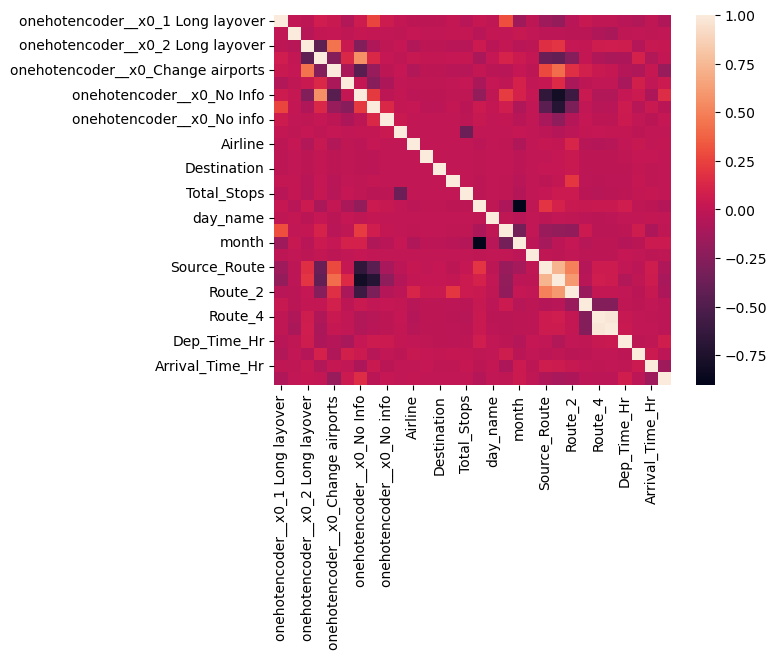

In [98]:
sns.heatmap(df.corr())

In [99]:
x = df.drop('Price',axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=100)

In [100]:
### Expriment 1
from sklearn.cluster import KMeans
kmean = KMeans()
kmean.fit(x_tr)
x_tr['cluster'] = kmean.predict(x_tr)
x_te['cluster'] = kmean.predict(x_te)

In [101]:
def get_score(model):
    
    model.fit(x_tr,y_tr)
    y_tr_pre = model.predict(x_tr)
    r2_score_tr = r2_score(y_true=y_tr,y_pred=y_tr_pre)
    y_te_pre = model.predict(x_te)
    r2_score_te = r2_score(y_true=y_te,y_pred=y_te_pre)
    return r2_score_te,r2_score_tr

In [102]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
model1 = SVR()
get_score(model1)

(-0.049526378240901225, -0.04399326782552637)

In [103]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
get_score(model2)

(1.0, 1.0)

In [104]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
get_score(model3)

(0.9999505970642846, 0.9998221864977114)

In [ ]:
from sklearn.model_selection import GridSearchCV
def get_best_estimator(param,model):
    grid = GridSearchCV(model,param_grid=param,cv=5)
    grid.fit(x_tr,y_tr)
    return get_score(grid.best_estimator_), grid.best_params_

In [ ]:
param_Dc = {
    'max_depth':[5,10,20,50,100,None],
    'min_samples_split':[2,3,5,10,15,20],
    'min_samples_leaf':[2,3,5,10,15,20]
}
param_Rf =  {
    'n_estimators':[80,90,100,120,150],
    'max_depth':[5,10,20,50,100,None],
    'min_samples_split':[2,3,5,10,15],
    #'min_samples_leaf':[2,3,5,10,15,20]
}

In [58]:
#get_best_estimator(param_Dc,model2)

In [59]:
#get_best_estimator(param_Rf,model3)

D:\ide\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

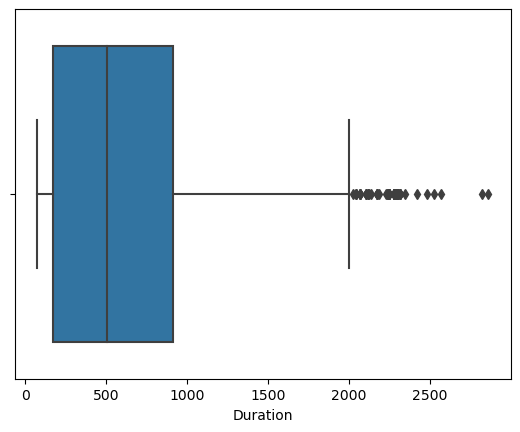

In [60]:
## Expriment 2
sns.boxplot(df['Duration'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

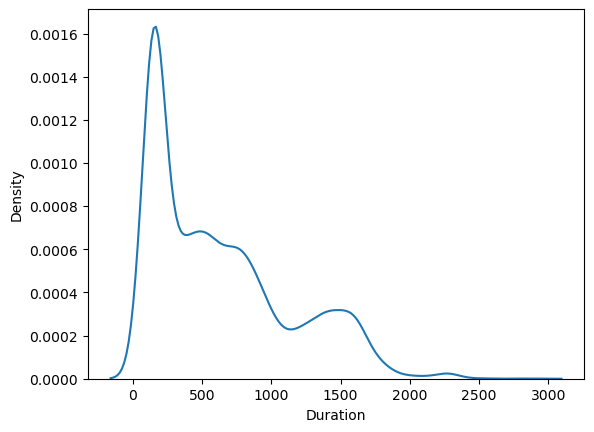

In [61]:
sns.kdeplot(df['Duration'])

<AxesSubplot:xlabel='transform', ylabel='Density'>

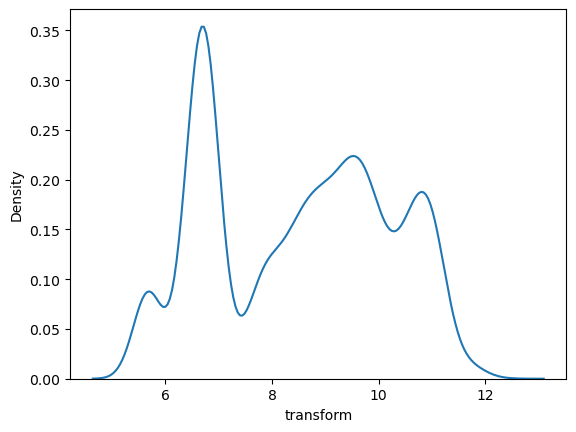

In [62]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='box-cox',standardize=False)
df['transform'] = transformer.fit_transform(df[['Duration']])
sns.kdeplot(df['transform'])

In [63]:
x = df.drop(['Price','Duration'],axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=10)

In [64]:
def get_score(model):
    
    model.fit(x_tr,y_tr)
    y_tr_pre = model.predict(x_tr)
    r2_score_tr = r2_score(y_true=y_tr,y_pred=y_tr_pre)
    y_te_pre = model.predict(x_te)
    r2_score_te = r2_score(y_true=y_te,y_pred=y_te_pre)
    return r2_score_te,r2_score_tr

In [65]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
model1 = SVR()
get_score(model1)

(0.04184481042232091, 0.029763180941987044)

In [66]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
get_score(model2)

(0.7810185011866733, 0.9966104120698255)

In [67]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
get_score(model3)

(0.8640028429580195, 0.9798926526697258)

In [68]:
## Combine both expriment
from sklearn.cluster import KMeans
kmean = KMeans()
kmean.fit(x_tr)
x_tr['cluster'] = kmean.predict(x_tr)
x_te['cluster'] = kmean.predict(x_te)

In [69]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
model1 = SVR()
get_score(model1)

(0.04189710567932137, 0.029774764589857394)

In [70]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
get_score(model2)

(0.7478341231502879, 0.9966104120698255)

In [71]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
get_score(model3)

(0.8675373081169616, 0.9812434355909498)

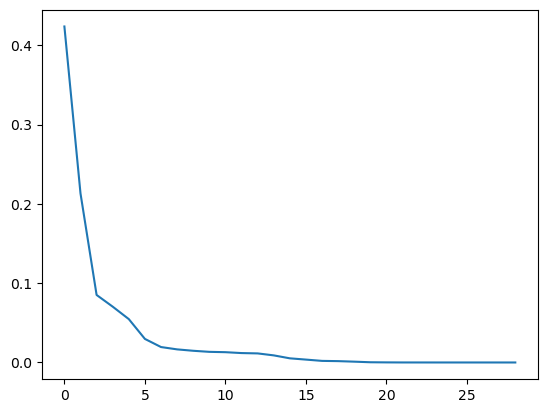

In [72]:
## Expriment 4 
x = df.drop(['Price','Duration'],axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=10)
from sklearn.preprocessing import RobustScaler
scaler =  RobustScaler()
x_tr_scaled = scaler.fit_transform(x_tr)
x_te_scaled = scaler.transform(x_te)
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(x_tr_scaled)
plt.plot(pca.explained_variance_ratio_)

In [73]:
pca = PCA(n_components=5)
x_tr = pca.fit_transform(x_tr_scaled)
x_te = pca.transform(x_te_scaled)

In [74]:
def get_score(model,x_tr,x_te,y_tr,y_te):
    
    model.fit(x_tr,y_tr)
    y_tr_pre = model.predict(x_tr)
    r2_score_tr = r2_score(y_true=y_tr,y_pred=y_tr_pre)
    y_te_pre = model.predict(x_te)
    r2_score_te = r2_score(y_true=y_te,y_pred=y_te_pre)
    return r2_score_te,r2_score_tr

In [75]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
model1 = SVR()
get_score(model1,x_tr,x_te,y_tr,y_te)

(0.037766844258003696, 0.02312072714610658)

In [76]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
get_score(model2,x_tr,x_te,y_tr,y_te)

(0.5153937187464062, 0.9966104120698255)

In [77]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
get_score(model3,x_tr,x_te,y_tr,y_te)

(0.7404081832252027, 0.9655584218081108)

In [78]:
df.head()

,Long layover,Short layover,Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight,...,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,transform
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,13.0,29.0,13.0,5.0,1.0,22.0,20.0,1.0,10.0,6.761332
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,25.0,1.0,3.0,5.0,1.0,5.0,50.0,13.0,15.0,8.474254
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,32.0,4.0,5.0,5.0,1.0,9.0,25.0,4.0,25.0,10.320455
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34.0,3.0,13.0,5.0,1.0,18.0,5.0,23.0,30.0,7.896170
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34.0,8.0,13.0,5.0,1.0,16.0,50.0,21.0,35.0,7.660036


In [79]:
## Final conclusion expriment 
x = df.drop(['Price'],axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=10)
from sklearn.cluster import KMeans
kmean = KMeans()
kmean.fit(x_tr)
x_tr['cluster'] = kmean.predict(x_tr)
x_te['cluster'] = kmean.predict(x_te)
"""from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_x_tr = scaler.fit_transform(x_tr)
scaled_x_te = scaler.transform(x_te)
"""

'from sklearn.preprocessing import RobustScaler\nscaler = RobustScaler()\nscaled_x_tr = scaler.fit_transform(x_tr)\nscaled_x_te = scaler.transform(x_te)\n'

In [57]:
def get_score(model,x_tr,x_te,y_tr,y_te):
    
    model.fit(x_tr,y_tr)
    y_tr_pre = model.predict(x_tr)
    r2_score_tr = r2_score(y_true=y_tr,y_pred=y_tr_pre)
    y_te_pre = model.predict(x_te)
    r2_score_te = r2_score(y_true=y_te,y_pred=y_te_pre)
    return r2_score_te,r2_score_tr

In [81]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
model1 = SVR()
get_score(model1,x_tr,x_te,y_tr,y_te)

(0.15191753962921561, 0.1277678170446085)

In [82]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
get_score(model2,x_tr,x_te,y_tr,y_te)

(0.7548097039062942, 0.9966104120698255)

In [83]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
get_score(model3,x_tr,x_te,y_tr,y_te)

(0.8632966593763431, 0.9815530381995564)

In [84]:
from sklearn.model_selection import GridSearchCV
def get_best_estimator(param,model,x_tr,x_te,y_tr,y_te):
    grid = GridSearchCV(model,param_grid=param,cv=5)
    grid.fit(x_tr,y_tr)
    return get_score(grid.best_estimator_,x_tr,x_te,y_tr,y_te), grid.best_params_

In [85]:
param_Dc = {
    'max_depth':[5,10,20,50,100,None],
    'min_samples_split':[2,3,5,10,15,20],
    'min_samples_leaf':[2,3,5,10,15,20]
}
param_Rf =  {
    'n_estimators':[80,90,100,120,150],
    'max_depth':[5,10,20,50,100,None],
    'min_samples_split':[2,3,5,10,15],
    #'min_samples_leaf':[2,3,5,10,15,20]
}

In [86]:
get_best_estimator(param_Dc,model2,x_tr,x_te,y_tr,y_te)

((0.8060860457766865, 0.9485119119677756),
 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10})

In [87]:
get_best_estimator(param_Rf,model3,x_tr,x_te,y_tr,y_te)

((0.8620269724212781, 0.9796858609488328),
 {'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 100})

In [92]:
d = data['Route'].isnull().sum()

In [93]:
type(d)

numpy.int64

In [95]:
print(d)

0


In [58]:
from xgboost import XGBRegressor


In [59]:
xgb = XGBRegressor()

In [60]:
xgb.fit(x_tr,y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
from sklearn.metrics import r2_score

In [63]:
xgb.fit(x_tr,y_tr)
y_tr_pre = xgb.predict(x_tr)
r2_score_tr = r2_score(y_true=y_tr,y_pred=y_tr_pre)
y_te_pre = xgb.predict(x_te)
r2_score_te = r2_score(y_true=y_te,y_pred=y_te_pre)
print(r2_score_te,r2_score_tr)

0.8896315258015584 0.9797654280650235


In [64]:
def get_score(model,x_tr,x_te,y_tr,y_te):
    
    model.fit(x_tr,y_tr)
    y_tr_pre = model.predict(x_tr)
    r2_score_tr = r2_score(y_true=y_tr,y_pred=y_tr_pre)
    y_te_pre = model.predict(x_te)
    r2_score_te = r2_score(y_true=y_te,y_pred=y_te_pre)
    return r2_score_te,r2_score_tr
from sklearn.model_selection import GridSearchCV
def get_best_estimator(param,model,x_tr,x_te,y_tr,y_te):
    grid = GridSearchCV(model,param_grid=param,cv=5)
    grid.fit(x_tr,y_tr)
    return get_score(grid.best_estimator_,x_tr,x_te,y_tr,y_te), grid.best_params_

In [65]:
xgb_param = {
    'n_estimators' : [50,100,150,200],
    'max_depth' : [10,30,90,None],
    'eta' : [0.001,0.01,0.1,1],
    'subsample' : [0.001,0.01,0.7,1]
}

In [68]:
get_best_estimator(xgb_param,xgb,x_tr,x_te,y_tr,y_te)

((0.8795069855592758, 0.976370170553241),
 {'eta': 0.001, 'max_depth': None, 'n_estimators': 100, 'subsample': 1})

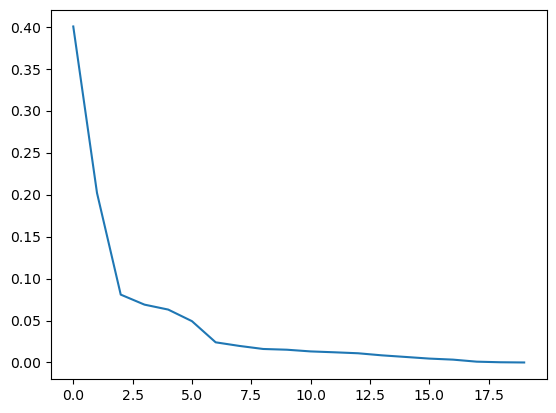

In [69]:
x = df.drop(['Price','Duration'],axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=10)
from sklearn.cluster import KMeans
kmean = KMeans()
kmean.fit(x_tr)
x_tr['cluster'] = kmean.predict(x_tr)
x_te['cluster'] = kmean.predict(x_te)
from sklearn.preprocessing import RobustScaler
scaler =  RobustScaler()
x_tr_scaled = scaler.fit_transform(x_tr)
x_te_scaled = scaler.transform(x_te)
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(x_tr_scaled)
plt.plot(pca.explained_variance_ratio_)

In [70]:
pca = PCA(n_components=5)
x_tr = pca.fit_transform(x_tr_scaled)
x_te = pca.transform(x_te_scaled)

In [71]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_tr,y_tr)
y_tr_pre = xgb.predict(x_tr)
r2_score_tr = r2_score(y_true=y_tr,y_pred=y_tr_pre)
y_te_pre = xgb.predict(x_te)
r2_score_te = r2_score(y_true=y_te,y_pred=y_te_pre)
print(r2_score_te,r2_score_tr)

0.7434468551120068 0.9385630563875469


In [72]:
xgb_param = {
    'n_estimators' : [50,100,150,200],
    'max_depth' : [10,30,90,None],
    'eta' : [0.001,0.01,0.1,1],
    'subsample' : [0.001,0.01,0.7,1]
}
get_best_estimator(xgb_param,xgb,x_tr,x_te,y_tr,y_te)

((0.7434468551120068, 0.9385630563875469),
 {'eta': 0.001, 'max_depth': None, 'n_estimators': 100, 'subsample': 1})

In [113]:
data['Duration'] = data['Duration'].apply(lambda x:x.replace('m','').replace('h',''))
data['Duration']

0        2 50
1        7 25
2          19
3        5 25
4        4 45
         ... 
10678    2 30
10679    2 35
10680       3
10681    2 40
10682    8 20
Name: Duration, Length: 10683, dtype: object